In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.enable_eager_execution()
print("TensorFlow version:", tf.__version__)

TensorFlow version: 1.14.0


In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

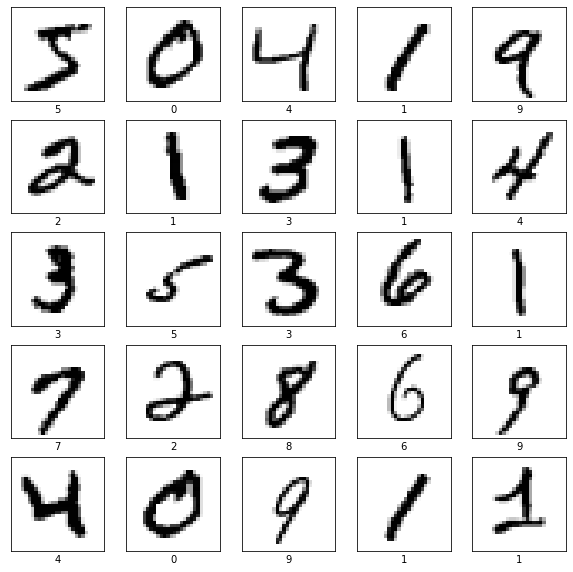

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [14]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.44062623, -0.24255952,  0.15727796, -0.22146714, -0.6137694 ,
        -0.27766204,  0.05281537, -0.16489634, -0.18386097, -0.34611288]],
      dtype=float32)

In [15]:
tf.nn.softmax(predictions).numpy()

array([[0.07906582, 0.0963847 , 0.1437657 , 0.09843928, 0.06649572,
        0.09306005, 0.12950537, 0.10416859, 0.10221168, 0.08690313]],
      dtype=float32)

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [17]:
loss_fn(y_train[:1], predictions).numpy()

2.3745103

In [18]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3004 - acc: 0.9126
Epoch 2/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.1435 - acc: 0.9576
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1070 - acc: 0.9667
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0863 - acc: 0.9735
Epoch 5/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0740 - acc: 0.9773


In [20]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0730 - acc: 0.9775


[0.07300477759661153, 0.9775]

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.save_weights('./model/hehe')

In [23]:
model_new = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [25]:
model_new.load_weights('./model/hehe')

In [26]:
probability_model = tf.keras.Sequential([
  model_new,
  tf.keras.layers.Softmax()
])

In [27]:
probability_model(x_test[:5])

<tf.Tensor: id=68685, shape=(5, 10), dtype=float32, numpy=
array([[3.67685224e-08, 2.39085240e-09, 3.68558358e-06, 3.62588944e-05,
        2.25849218e-11, 6.96611968e-09, 1.58193567e-14, 9.99958038e-01,
        1.07289068e-07, 1.93582537e-06],
       [3.73239606e-10, 1.94610373e-04, 9.99802411e-01, 1.78432492e-06,
        2.81571381e-12, 1.15719672e-06, 1.59946918e-08, 4.57820414e-13,
        4.58320226e-09, 2.05367922e-13],
       [2.66441504e-07, 9.98999178e-01, 1.75233174e-04, 1.43174602e-05,
        9.85752413e-05, 8.79082745e-06, 2.65252729e-05, 3.90763977e-04,
        2.86000140e-04, 4.21101788e-07],
       [9.99724805e-01, 1.20994139e-08, 1.54009482e-04, 4.86942099e-07,
        4.04351141e-07, 1.56057035e-06, 1.00656194e-04, 1.35255577e-05,
        3.20868230e-06, 1.27267072e-06],
       [1.87582123e-06, 1.06038534e-07, 1.51182612e-05, 5.76644481e-07,
        9.97413456e-01, 1.74546210e-06, 4.12403097e-06, 3.00514330e-05,
        3.26408235e-06, 2.52970844e-03]], dtype=float32)>

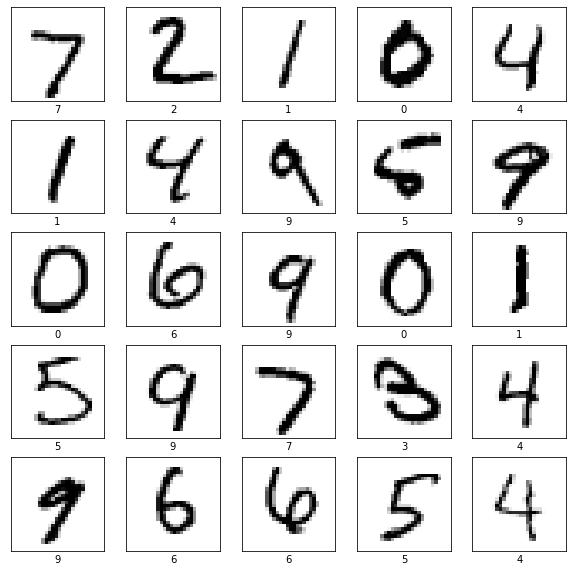

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [29]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


In [30]:
predictions = probability_model.predict(x_test)

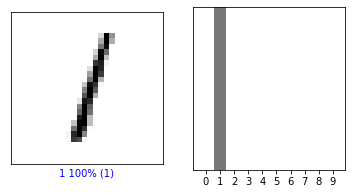

In [31]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

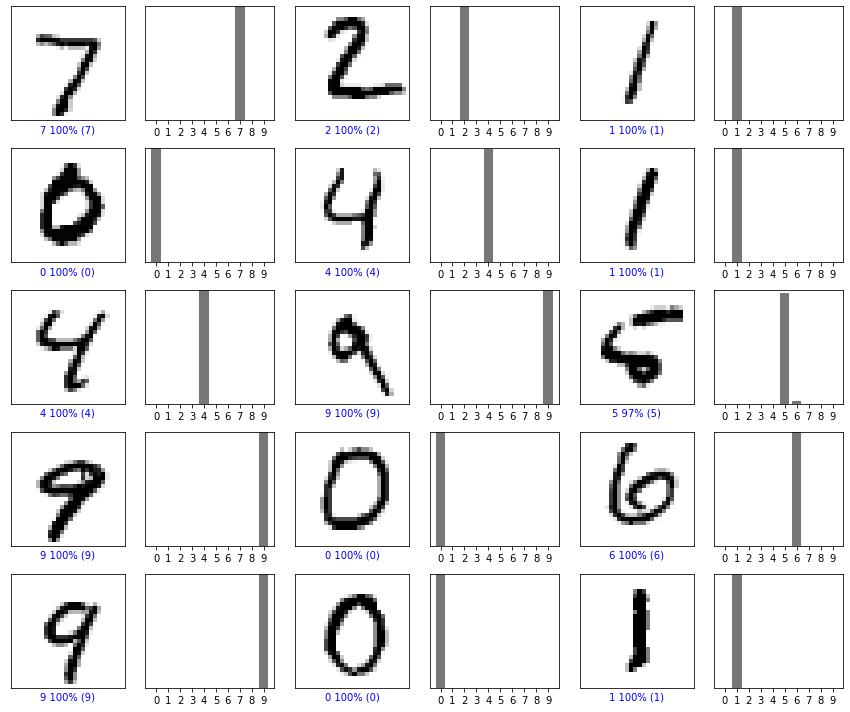

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  y_test)
plt.tight_layout()
plt.show()
